# Proyek Analisis Data: PRSA_Data_Dongsi_20130301-20170228
- **Nama:** MOCHAMAD PHILLIA WIBOWO
- **Email:** boyphilli4@gmail.com / a012ybf393@devacademy.id
- **ID Dicoding:** Phillia Wibowo a012ybf393

## Menentukan Pertanyaan Bisnis

- Bagaimana Konsentrasi zat pencemar di kota Dongsi pada 5 tahun terakhir ?
- Apakah diantara zat pencemar ada hubungan korelasi ?

## Import Semua Packages/Library yang Digunakan

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [63]:
airdongsi_df=pd.read_csv("/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
airdongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


**Insight:**
- Dataset kualitas udara di Kota Dongsi dihitung setiap 1 jam
- Dataset kualitas udara memiliki 5 tahun terakhir
- Dataset diatas year ,month dan day dapat di gabung

### Assessing Data

Menampilkan tipe data pada tiap kolom

In [64]:
airdongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Menampilkan nilai unik setiap kolom

In [65]:
airdongsi_df.nunique()

,0
No,35064
year,5
month,12
day,31
hour,24
PM2.5,582
PM10,666
SO2,392
NO2,701
CO,115


Menampilkan deskripsi pada dataframe

In [66]:
airdongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Pengecekan Data NaN

In [67]:
airdongsi_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601
CO,3197


Pengecekan data duplikasi

In [68]:
print("Jumlah data yang terduplikasi",airdongsi_df.duplicated().sum())

Jumlah data yang terduplikasi 0


**Insight:**
- Di tabel diatas tidak terdapat data duplikat
-   Terdapat nilai yang missing value yang akan dilakukan di drop
-   Terdapat 3 kolom tentang datetime yaitu year, month dan day akan digabung dan diubah menjadi tipe data datetime

### Cleaning Data

Menghapus nilai NaN

In [69]:
airdongsi_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601
CO,3197


In [70]:
airdongsi_df=airdongsi_df.dropna()

In [71]:
airdongsi_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Menghapus data yang bernilai NaN supay tidak menggangu pada saat dilakukan analisis data


## Exploratory Data Analysis (EDA)

### Explore airdongsi_df

Melakukan grouping pada year terhadap kolom faktor lingkungan

In [72]:
airdongsi_df.groupby(by="year").agg({
    "No":"nunique",
    "PM2.5":["min","max","mean"],
    "PM10":["min","max","mean"],
    "SO2":["min","max","mean"],
    "NO2":["min","max","mean"],
    "CO":["min","max","mean"],
    "TEMP":["min","max","mean"]
})

No PM2.5                   PM10                     SO2         \
     nunique   min    max       mean  min    max        mean  min    max   
year                                                                       
2013    4574   3.0  520.0  89.258854  2.0  602.0  111.807390  1.0  198.0   
2014    7612   3.0  603.0  82.468891  3.0  794.0  114.785129  2.0  188.0   
2015    8551   3.0  685.0  87.031096  5.0  816.0  111.775149  2.0  145.0   
2016    8272   3.0  695.0  80.304521  5.0  891.0  103.554159  2.0  201.0   
2017    1329   3.0  681.0  99.471031  5.0  955.0  127.714071  1.0  300.0   

                 NO2                       CO                        TEMP  \
           mean  min    max       mean    min      max         mean   min   
year                                                                        
2013  25.356799  2.0  258.0  59.873037  100.0   9400.0  1340.712068  -8.3   
2014  19.380439  2.0  236.0  55.833290  100.0   7700.0  1306.647399 -11.0   
2015  15.129716  4.0  256.0  50.396515  100.0  10000.0  1339.211788 -10.0   
2016  11.592118  2.0  210.0  51.267166  100.0   9900.0  1246.965667 -16.8   
2017  20.171558  2.0  192.0  57.028593  100.0   9500.0  1576.824680  -9.7   

                       
       max       mean  
year                   
2013  35.7  15.044644  
2014  40.4  15.490016  
2015  38.8  13.355462  
2016  37.3  13.474692  
2017  15.4   0.688799

Melakukan pengubahan column Year,Month dan day menjadi tipe data datetime

In [73]:
airdongsi_df['date']=pd.to_datetime(airdongsi_df[['year','month','day']])

In [74]:
airdongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,2013-03-01
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,2013-03-01
5,6,2013,3,1,5,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Dongsi,2013-03-01
6,7,2013,3,1,6,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,NW,2.2,Dongsi,2013-03-01
7,8,2013,3,1,7,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,NNW,3.0,Dongsi,2013-03-01


Melakukan perhitungan arah mata angin di Kota GuanYuan

In [75]:
airdongsi_df.groupby(by=["year","wd"]).agg({
    "No":"count"
})

No
year wd      
2013 E    481
     ENE  452
     ESE  401
     N    322
     NE   366
...       ...
2017 SSW   25
     SW   169
     W     21
     WNW   23
     WSW   53

[80 rows x 1 columns]

**Insight:**
- Mendapatkan nilai max,min dan mean dari nilai PM2.5, PM10, SO2, NO2, CO, O3, TEMP yang hitung 5 tahun terahir
- Melakukan penambahan kolom baru yaitu date dengan cara menggabungakan kolom year,month dan day
-   Melakukan grouping untuk mengetahui arah mata angin paling banyak di 5 tahun terakhir

In [76]:
airdongsi_df.to_csv("clean.csv",index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Konsentrasi zat pencemar di kota Dongsi pada 5 tahun terakhir ?

In [77]:
airdongsi_df["year"].unique()

array([2013, 2014, 2015, 2016, 2017])

Melakukan grouping

In [78]:
visual=airdongsi_df.groupby(by=["year","month"]).agg({
    "PM2.5":"mean",
    "PM10":"mean",
    "SO2":"mean",
    "CO":"mean",
    "O3":"mean",
    "NO2":"mean",
})

Visualisasi Tahun 2013

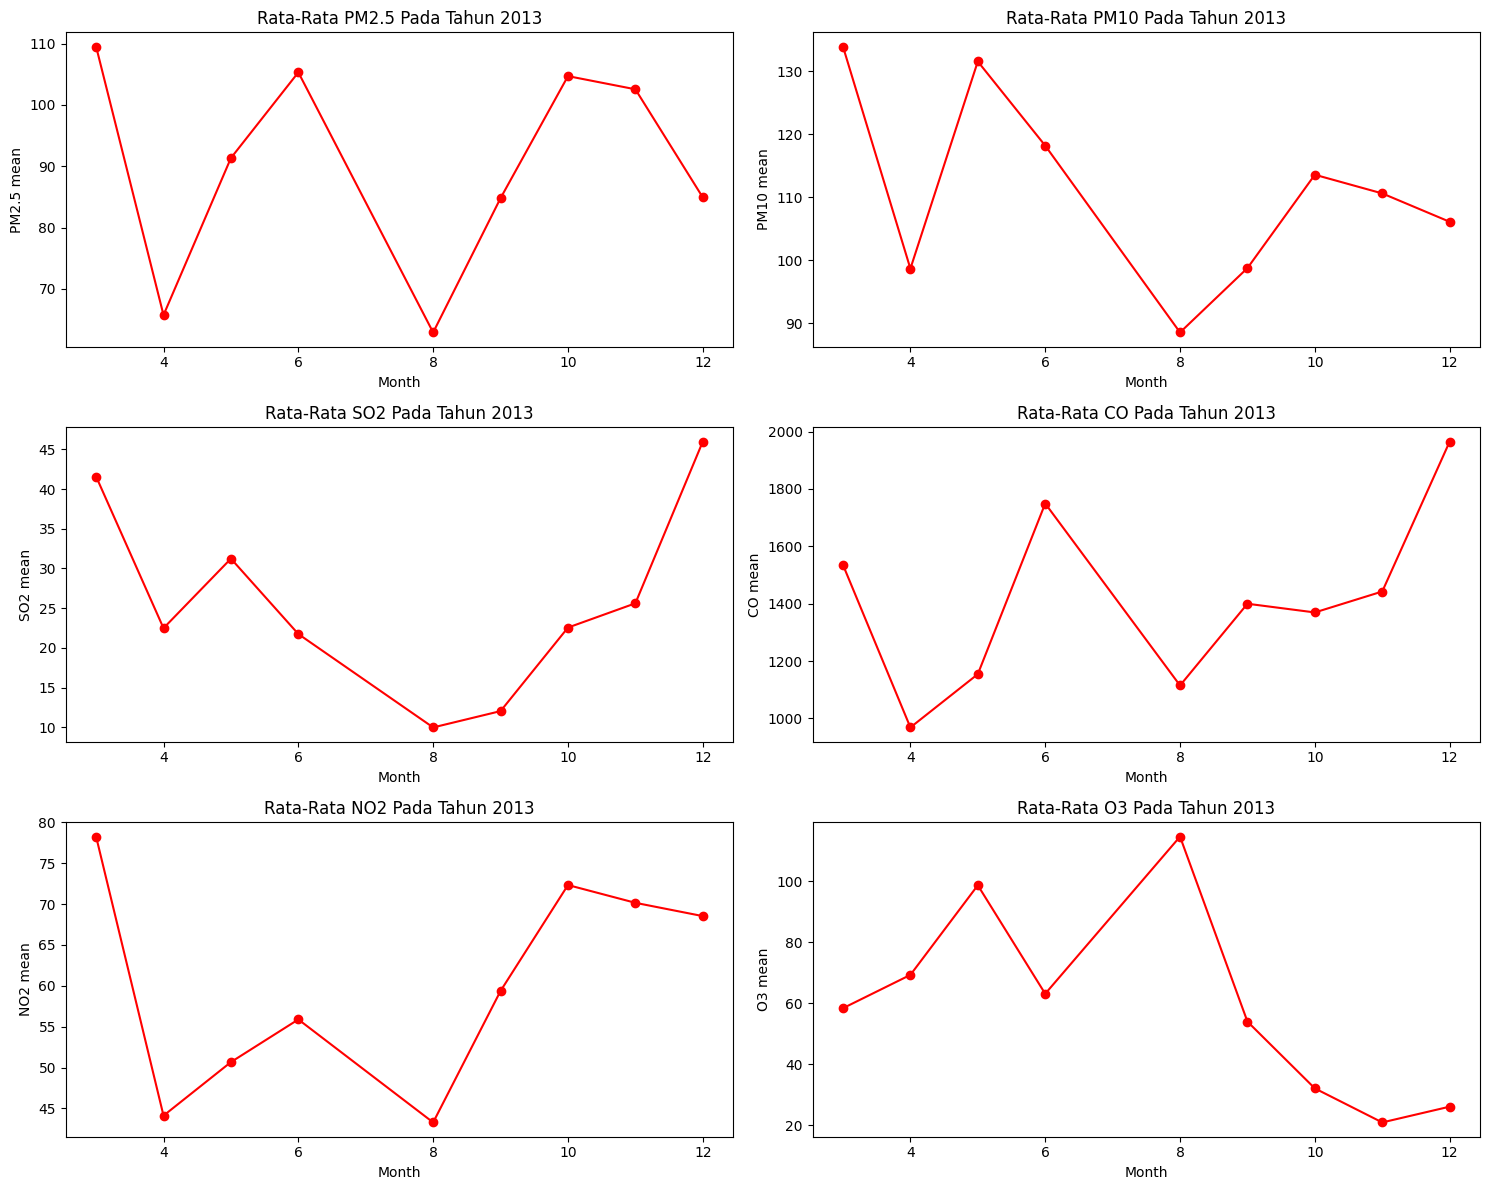

In [79]:
data_2013=visual.loc[2013]

variables=["PM2.5","PM10","SO2","CO","NO2","O3"]
fig,axes=plt.subplots(3,2,figsize=(15,12))
axes=axes.flatten()

for i, var in enumerate (variables):
  axes[i].plot(data_2013.index,data_2013[var],marker='o', color='red')
  axes[i].set_title(f'Rata-Rata {var} Pada Tahun 2013')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var} mean')

plt.tight_layout()
plt.show()

 Visualisasi Tahun 2014

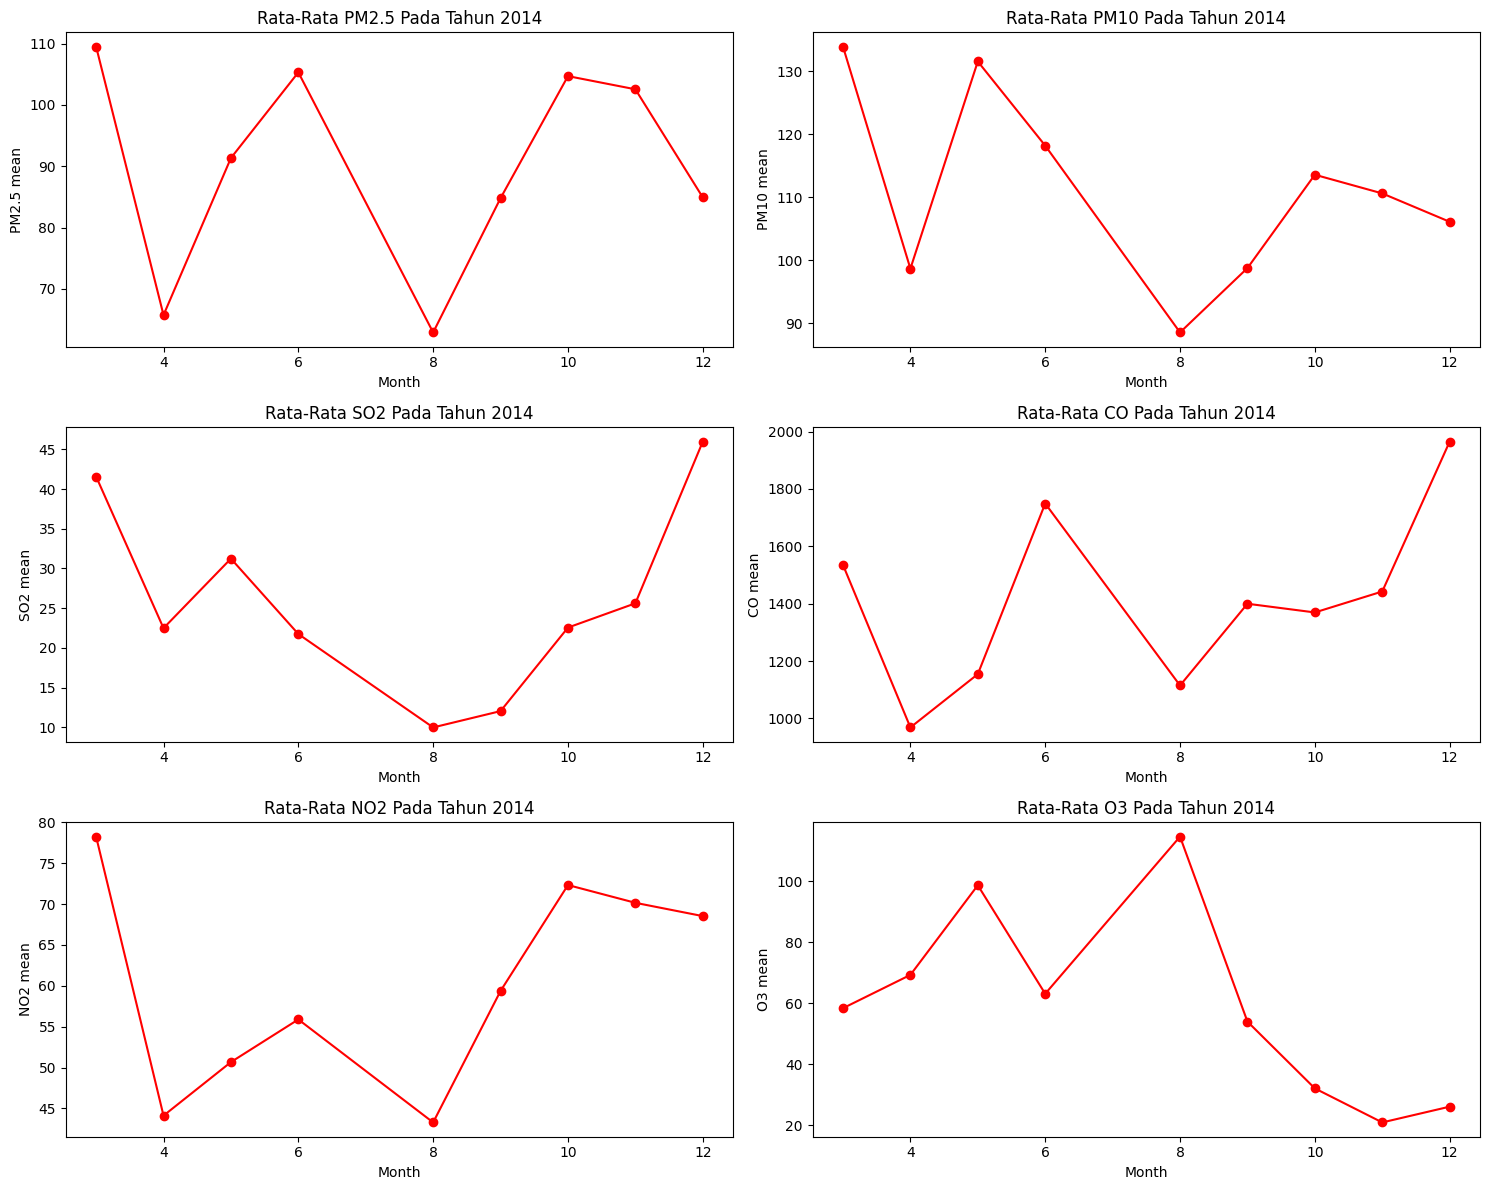

In [80]:
data_2014=visual.loc[2014]

variables=["PM2.5","PM10","SO2","CO","NO2","O3"]
fig,axes=plt.subplots(3,2,figsize=(15,12))
axes=axes.flatten()

for i, var in enumerate (variables):
  axes[i].plot(data_2013.index,data_2013[var],marker='o', color='red')
  axes[i].set_title(f'Rata-Rata {var} Pada Tahun 2014')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var} mean')

plt.tight_layout()
plt.show()

Visualisasi Tahun 2015

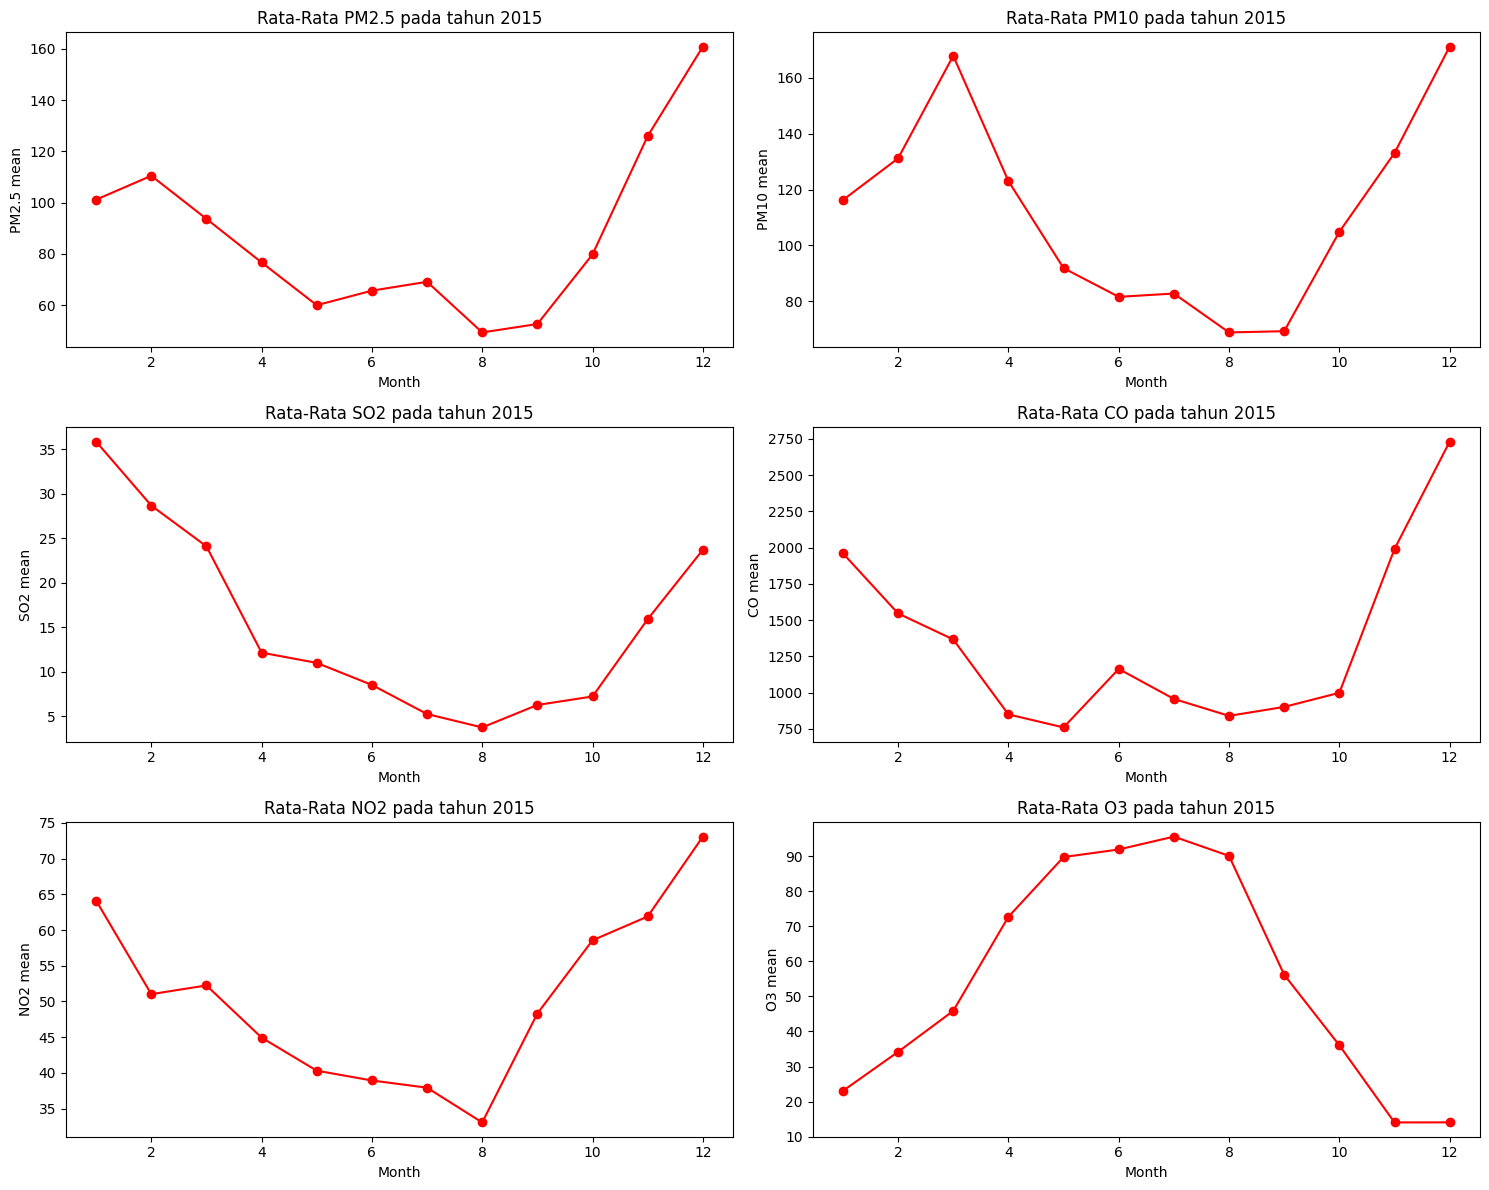

In [81]:
data_2015=visual.loc[2015]

variables=["PM2.5","PM10","SO2","CO","NO2","O3"]

fig,axes=plt.subplots(3,2,figsize=(15,12))
axes=axes.flatten()

for i,var in enumerate (variables):
  axes[i].plot(data_2015.index,data_2015[var],marker="o", color='red')
  axes[i].set_title(f'Rata-Rata {var} pada tahun 2015')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var} mean')


plt.tight_layout()
plt.show()

Visualisasi Tahun 2016

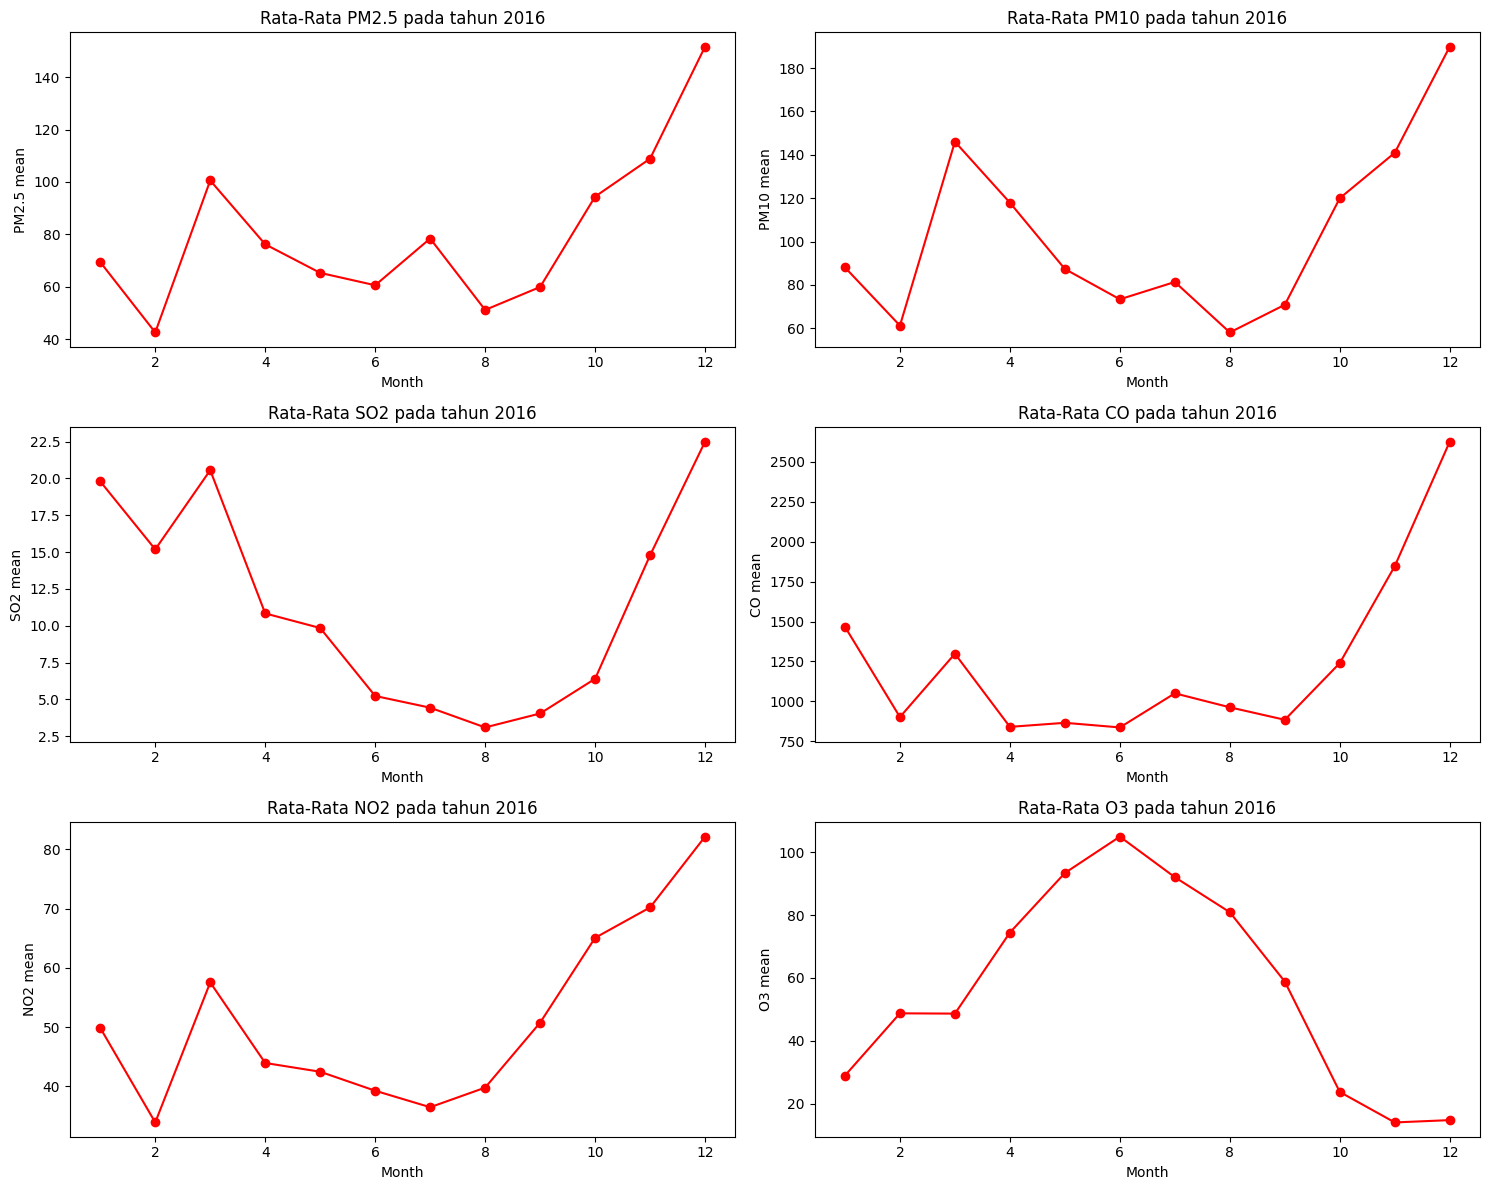

In [82]:
data_2016=visual.loc[2016]

variables=["PM2.5","PM10","SO2","CO","NO2","O3"]

fig,axes=plt.subplots(3,2,figsize=(15,12))
axes=axes.flatten()

for i, var in enumerate (variables):
  axes[i].plot(data_2016.index,data_2016[var],marker="o", color='red')
  axes[i].set_title(f'Rata-Rata {var} pada tahun 2016')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var} mean')

plt.tight_layout()
plt.show()

Visualisasi Tahun 2017

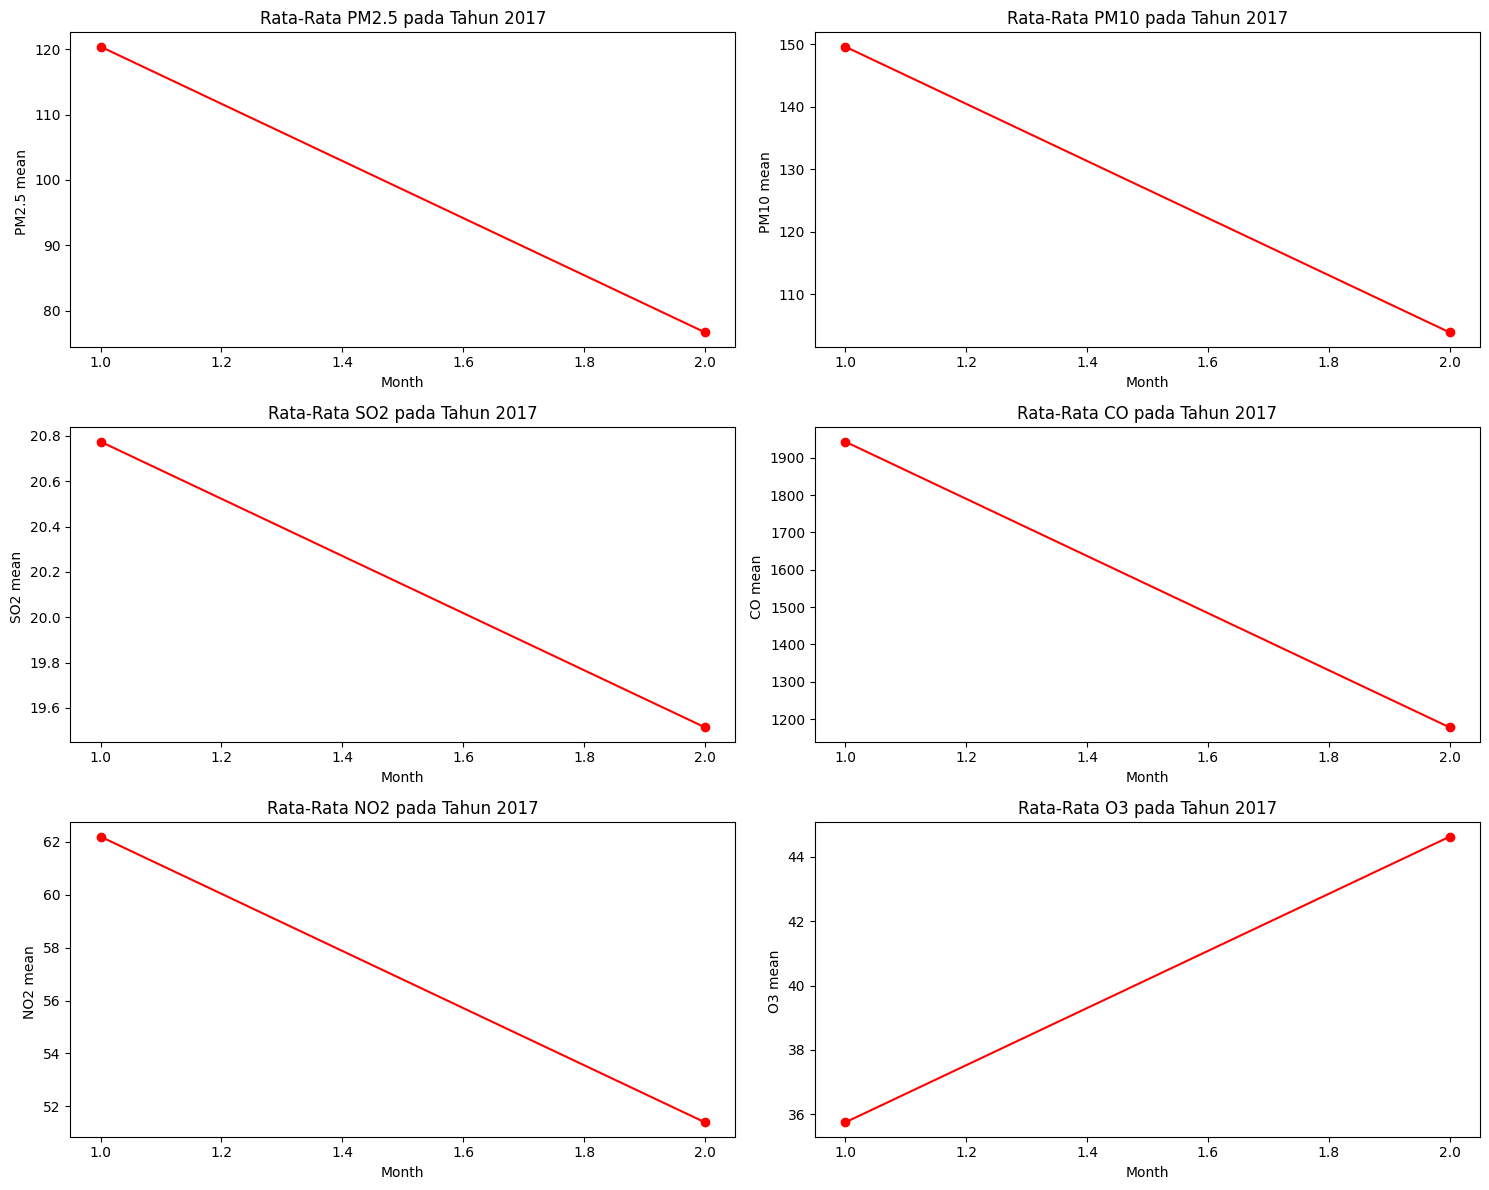

In [83]:
data_2017=visual.loc[2017]
variables=["PM2.5","PM10","SO2","CO","NO2","O3"]
fig,axes=plt.subplots(3,2,figsize=(15,12))
axes=axes.flatten()

for i,var in enumerate (variables):
  axes[i].plot(data_2017.index,data_2017[var],marker="o", color='red')
  axes[i].set_title(f'Rata-Rata {var} pada Tahun 2017')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var} mean ')


plt.tight_layout()
plt.show()

**Insight**
- Pada tahun 2013, zat pencemar CO dan SO2 menunjukkan peningkatan signifikan pada akhir tahun, sementara O3 cenderung menurun setelah mencapai puncaknya di pertengahan tahun.
- Pada tahun 2014, menunjukkan pola musiman yang mirip dengan tahun sebelumnya, dengan peningkatan signifikan pada akhir tahun untuk CO dan SO2, serta penurunan O3 setelah pertengahan tahun.
- Pada tahun 2015, cenderung rendah di pertengahan tahun dan meningkat tajam menjelang akhir tahun, terutama untuk PM2.5, PM10, dan CO.
- Pada tahun 2016, menunjukkan pola peningkatan signifikan pada akhir tahun, terutama untuk PM2.5, PM10, dan CO, sementara O3 mencapai puncaknya di pertengahan tahun sebelum menurun drastis.
- Pada tahun 2017, tampak tidak lengkap karena hanya mencakup dua bulan pertama, sehingga tren tahunan tidak dapat disimpulkan dengan pasti.

### Pertanyaan 2: Apakah diantara zat pencemar ada hubungan korelasi ?

Menampilkan visualisasi korelasi antar zat pencemar menggunakan heatmap

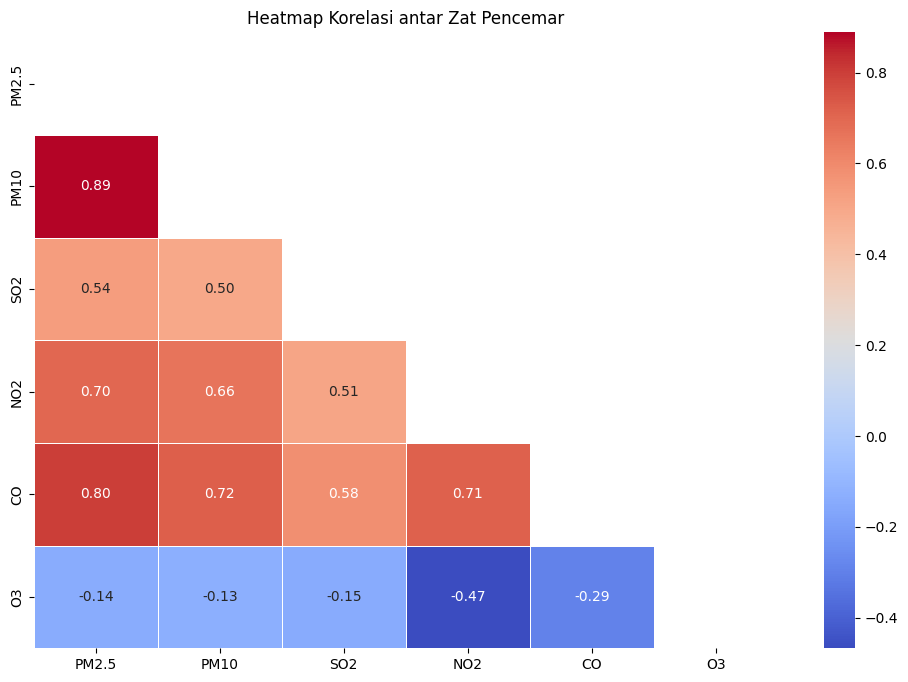

In [84]:
corr_matrix=airdongsi_df[['PM2.5','PM10','SO2','NO2','CO','O3']].corr()
mask=np.triu(np.ones_like(corr_matrix,dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f",mask=mask,linewidths=0.5)
plt.title('Heatmap Korelasi antar Zat Pencemar')
plt.show()

**Insight:**
- PM2.5, PM10, NO2, dan CO memiliki korelasi positif yang kuat satu sama lain.
- O3 menunjukkan korelasi negatif terhadap zat pencemar lainnya.

## Conclusion

- Dari hasil visualisasi pertanyaan bisnis 1, zat pencemar udara seperti PM2.5, PM10, SO2, CO, NO2, dan O3 menunjukkan pola fluktuatif setiap tahunnya.
- Pola tahunan menunjukkan tren peningkatan konsentrasi zat pencemar di akhir tahun (November-Desember) dan penurunan pada pertengahan tahun.

- Pada korelasi zat pencemar pada heatmap pertanyaan bisnis 2, PM2.5, PM10, NO2, dan CO memiliki korelasi positif yang kuat, menunjukkan bahwa peningkatan salah satu polutan kemungkinan besar diikuti oleh peningkatan polutan lainnya.
- SO2 memiliki korelasi sedang terhadap polutan lainnya, menunjukkan keterkaitan yang lebih rendah dibandingkan PM2.5 dan PM10.